# Gaussian Beam



A Gaussian beam is an important solution in optics as it represents a confined electromagnetic wave in form of a beam. In most of the cases, the intensity profiles of laser beams is approximately Gaussian and therefore the Gaussian beam is an important solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
import matplotlib as mpl
import matplotlib.cm as cm


from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 5,
                     'axes.labelsize': 10,
                     'axes.labelpad':0,
                     'xtick.labelsize' : 9,
                     'ytick.labelsize' : 9,
                     'legend.fontsize' : 8,
                     'contour.linewidth' : 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (4, 3),
                     'axes.titlesize':10,
                     'figure.dpi': 150 }) 

def get_size(w,h):
    return((w/2.54,h/2.54))


## Equations


The Gaussian beam is obtained when solving the so-called paraxial Helmholtz equation

\begin{equation}
\left ( \frac{\partial^2 }{\partial x^2}+\frac{\partial^2 }{\partial y^2}-2ik\frac{\partial }{\partial z}\right ) E(\vec{r})=0
\end{equation}

Paraxial hereby means that we neglect strong intensity changes along the beam propagation direction on distances comparable to the wavelength. One of the solutions of this equation is the Gaussian beam. The electric field of the Gaussian beam reads 

\begin{equation}
E(\rho,z)=E_{0}\frac{w_0}{w(z)}e^{-\frac{\rho^2}{w(z)^2}}e^{i\left [ kz+k\frac{\rho^2}{2R(z)} -\Psi(z)\right ]}
\end{equation}

Here $\rho=\sqrt(x^2+y^2)$ is the distance from the propgation direction (z-axis). 
$w=w_0\sqrt{1+(z/z_r)^2}$ is the beam radius and $w_0$ is the beam waist, which is related to the Rayleigh length $z_r=\pi w_{0}^2/\lambda$. 
$R=z(1+(z_r/z)^2)$ denotes the curvature of the wavefronts.


With the help of these parameters, we may now write a function which calculates the electric field of a Gaussian beam.

In [15]:
def gaussian_beam(k,omega, r,w0,t):
    zr=np.pi*w0**2*k/2/np.pi
    x=r[0]
    y=r[1]
    z=r[2]
    rho2=x**2+y**2
    w=w0*np.sqrt(1+(z/zr)**2)
    R=z*(1+(zr/z)**2)
    psi=np.arctan(z/zr)
    E=w0*np.exp(-rho2/w**2)*np.exp(1j*(k*z+k*rho2/(2*R)-psi))*np.exp(-1j*omega*t)/w
    return(E)

In [16]:
x=np.linspace(-6e-6,6e-6,300)
z=np.linspace(-10e-6,10e-6,600)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c



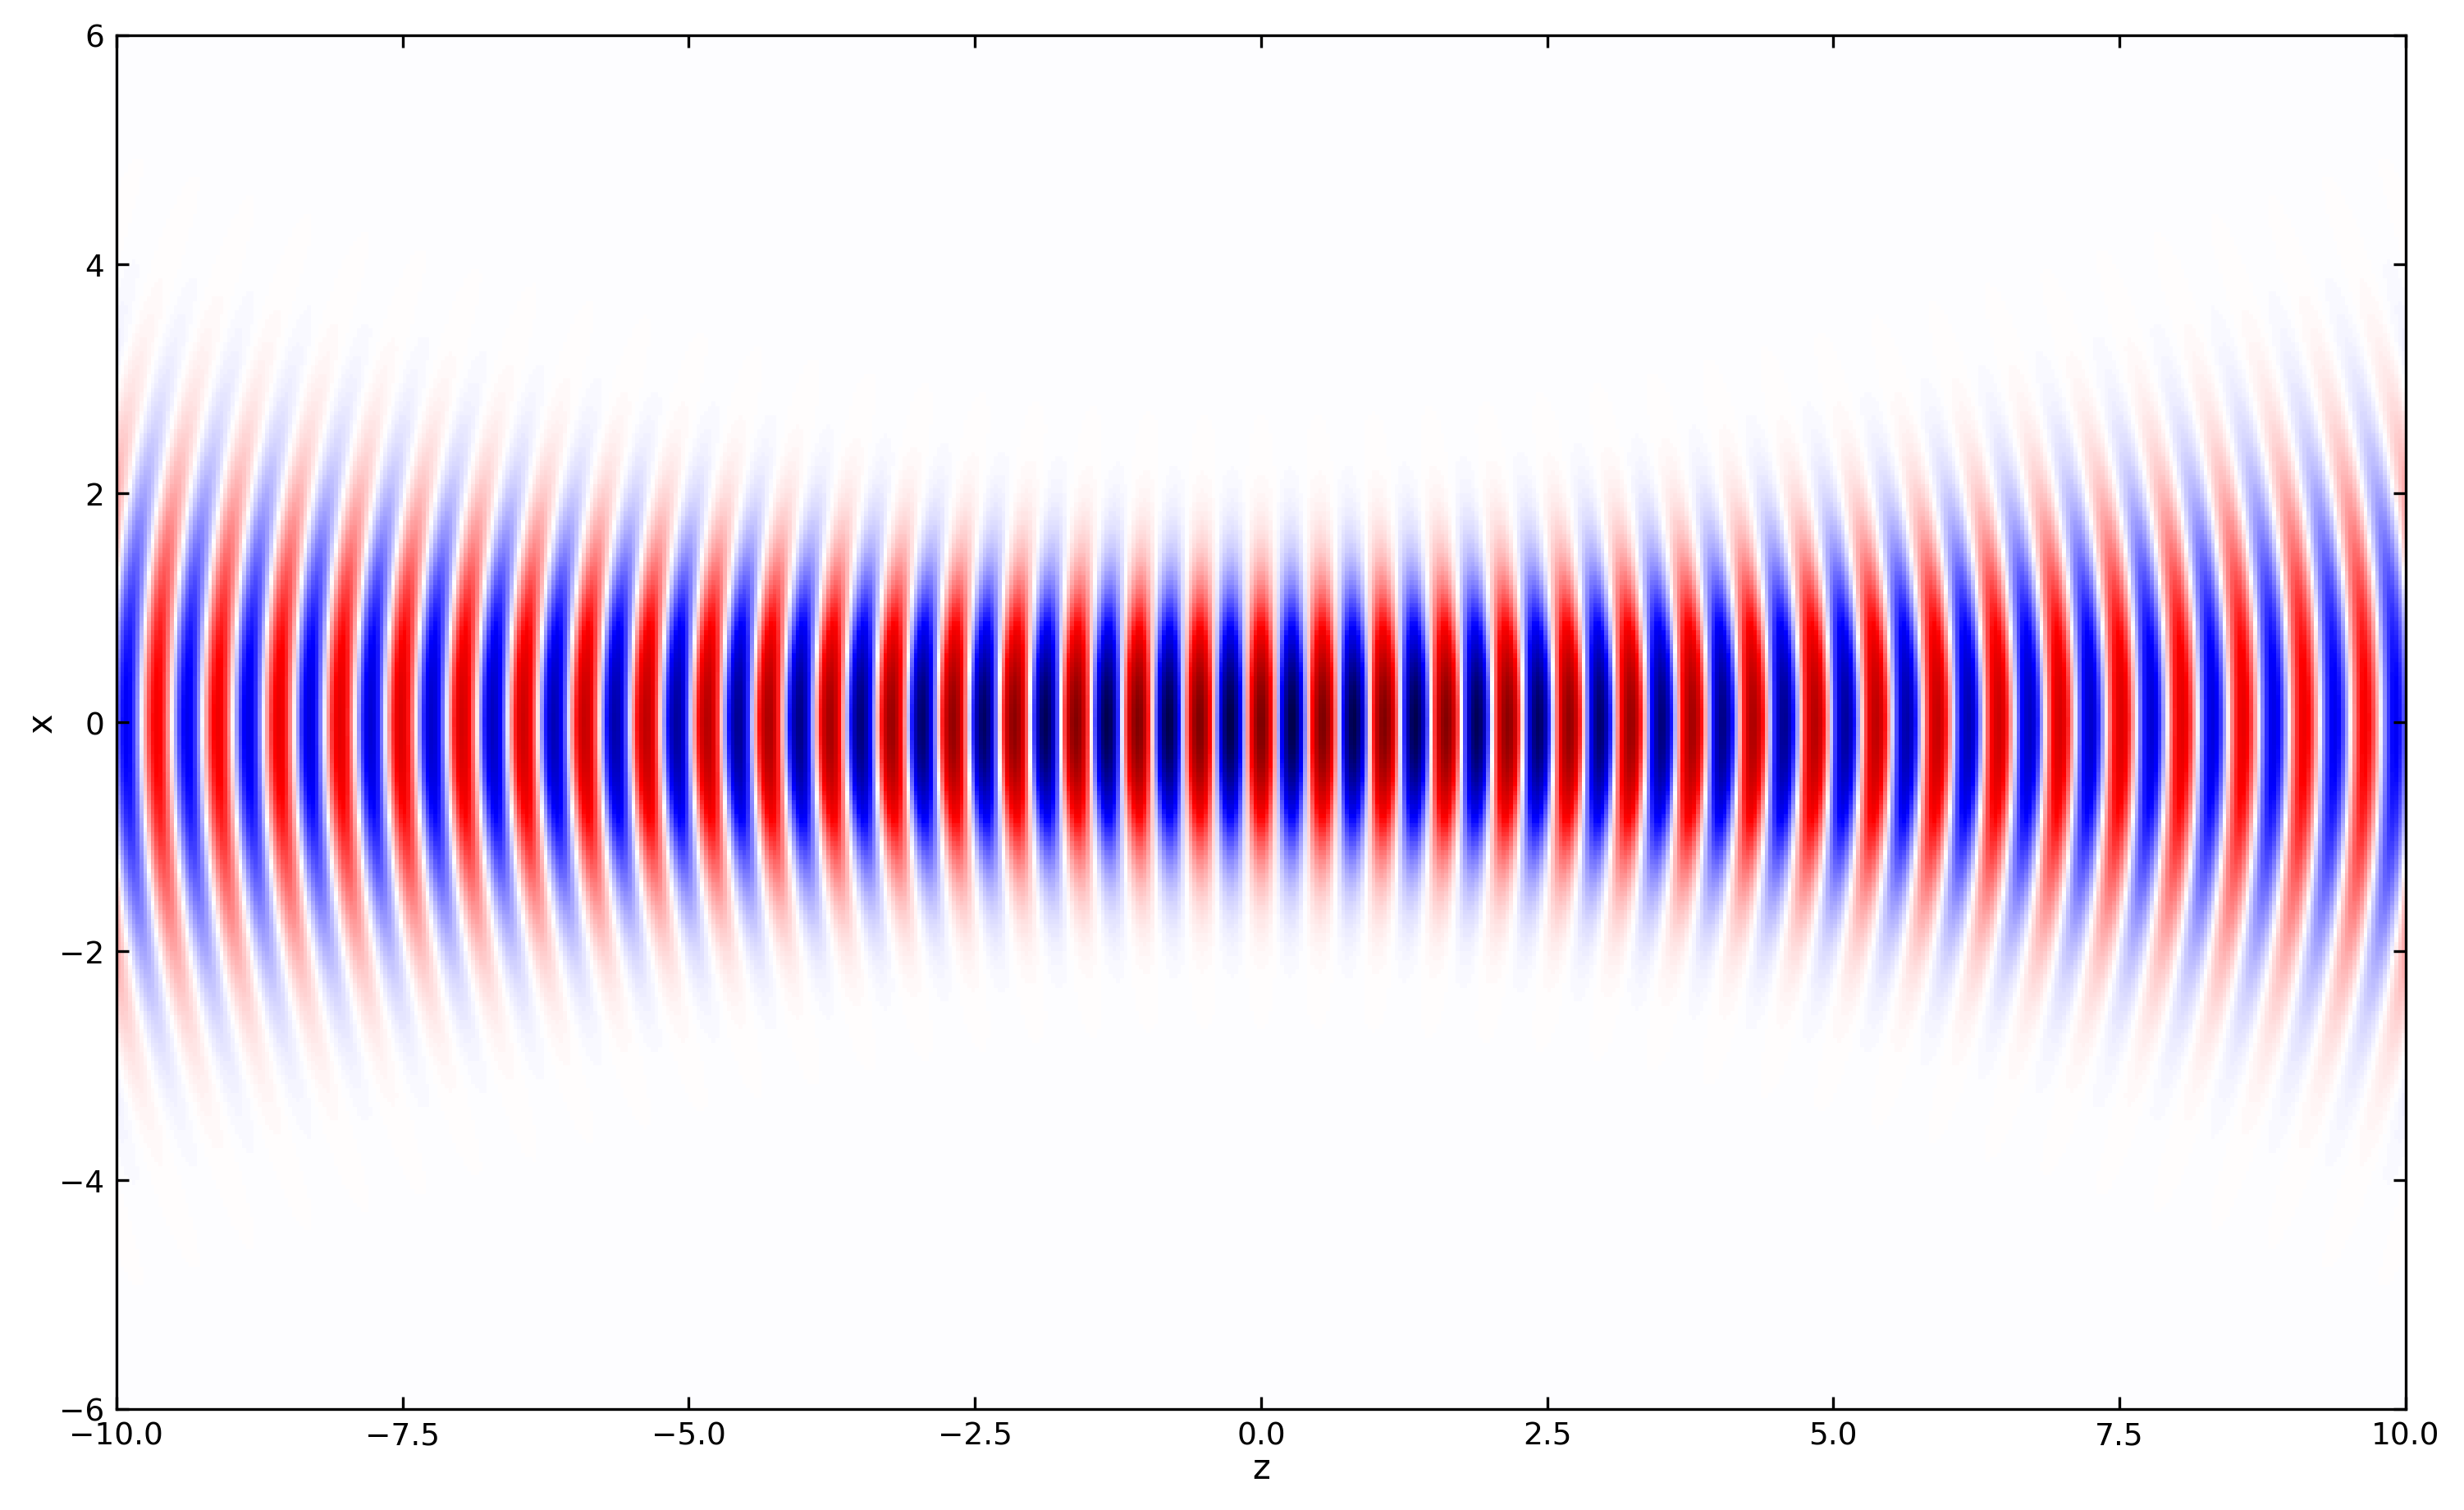

In [17]:
plt.figure(figsize=(12,8))
field=gaussian_beam(k0,omega0,r,1e-6,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.imshow(np.real(field.transpose()),cmap='seismic',extent=extent)
plt.xlabel('z')
plt.ylabel('x')
plt.show()

## Animation 

As in the other cases before, we may also have a look at the propagation of the Gaussian beam in an animation.

In [18]:
canvas = Canvas(width=600, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=600)

In [19]:
#normalize the color map to a certain value range
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

#call the color map
cmap = cm.seismic

# do the mapping of values to color values.
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [20]:
def animate(k,time):
    for t in time:
        field=gaussian_beam(k0,omega0,r,1e-6,t)
        data=np.zeros([300,600,3])
        tmp=np.real(field.transpose())
        data[:,:,2]=np.where(tmp<0,-tmp,0)
        data[:,:,0]=np.where(tmp>=0,tmp,0)
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
            #canvas.put_image_data(data*255,0,0)
        sleep(0.02)

In [21]:

time= np.linspace(0,2e-14,100)
animate(k0,time)

## Intensity plot

The intensity is plotted below in form of a contour plot. The contour plot reveals the in the focal region, the iso-intensity shapes are close to an ellipsoid. Such ellipsoids are used as approximate shapes for example to calculate the passage of fluorescent molecules through the focal area in fluorescence correlation spectroscopy (FCS).

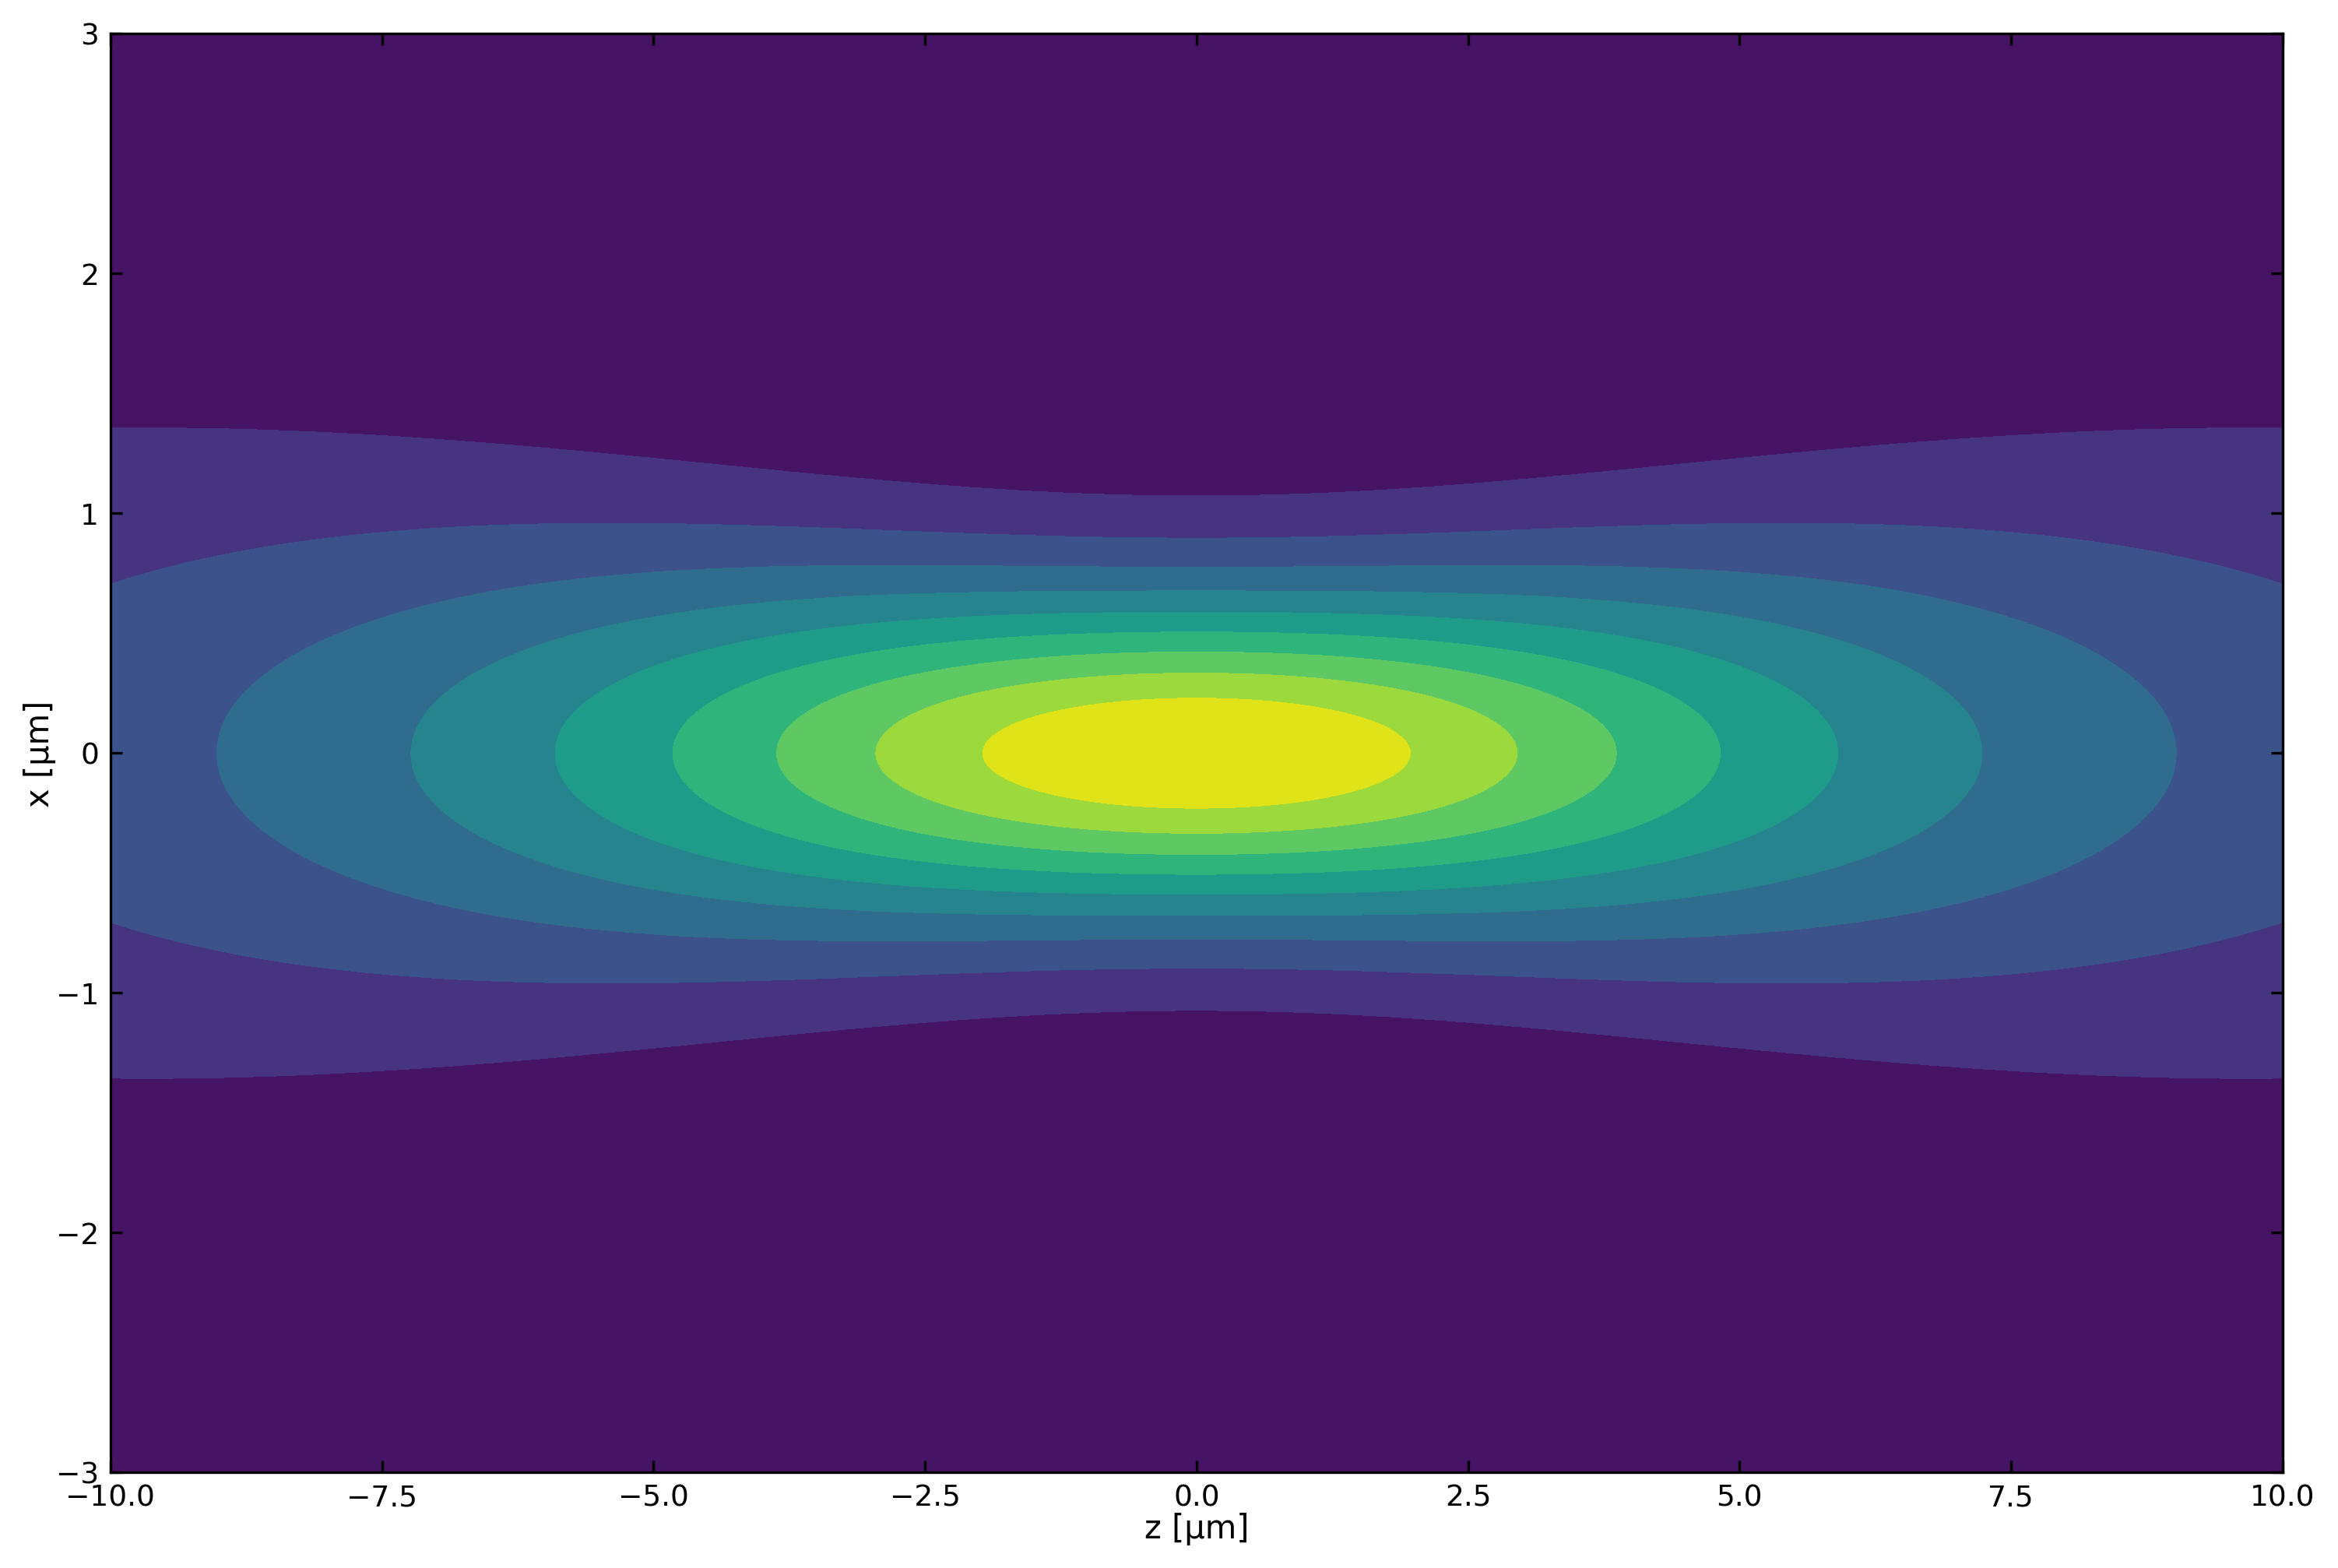

In [22]:
x=np.linspace(-3e-6,3e-6,1000)
z=np.linspace(-10e-6,10e-6,1000)

#X,Y=np.meshgrid(x,y)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

plt.figure(figsize=(12,8))
field=gaussian_beam(k0,omega0,r,1e-6,0)


extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.contourf(Z*1e6,X*1e6,np.abs(field)**2,10)

plt.xlabel('z [µm]')
plt.ylabel('x [µm]')
plt.show()

## Intensity profiles

A Gaussian beam is characterized by a Gaussian intensity distribution perpendicular to the optical axis (z-axis here). We can check that by plotting the intensity of the beam at a certain position z along the progation direction. Along the optical axis, the intensity profile conforms with a Lorentzian.

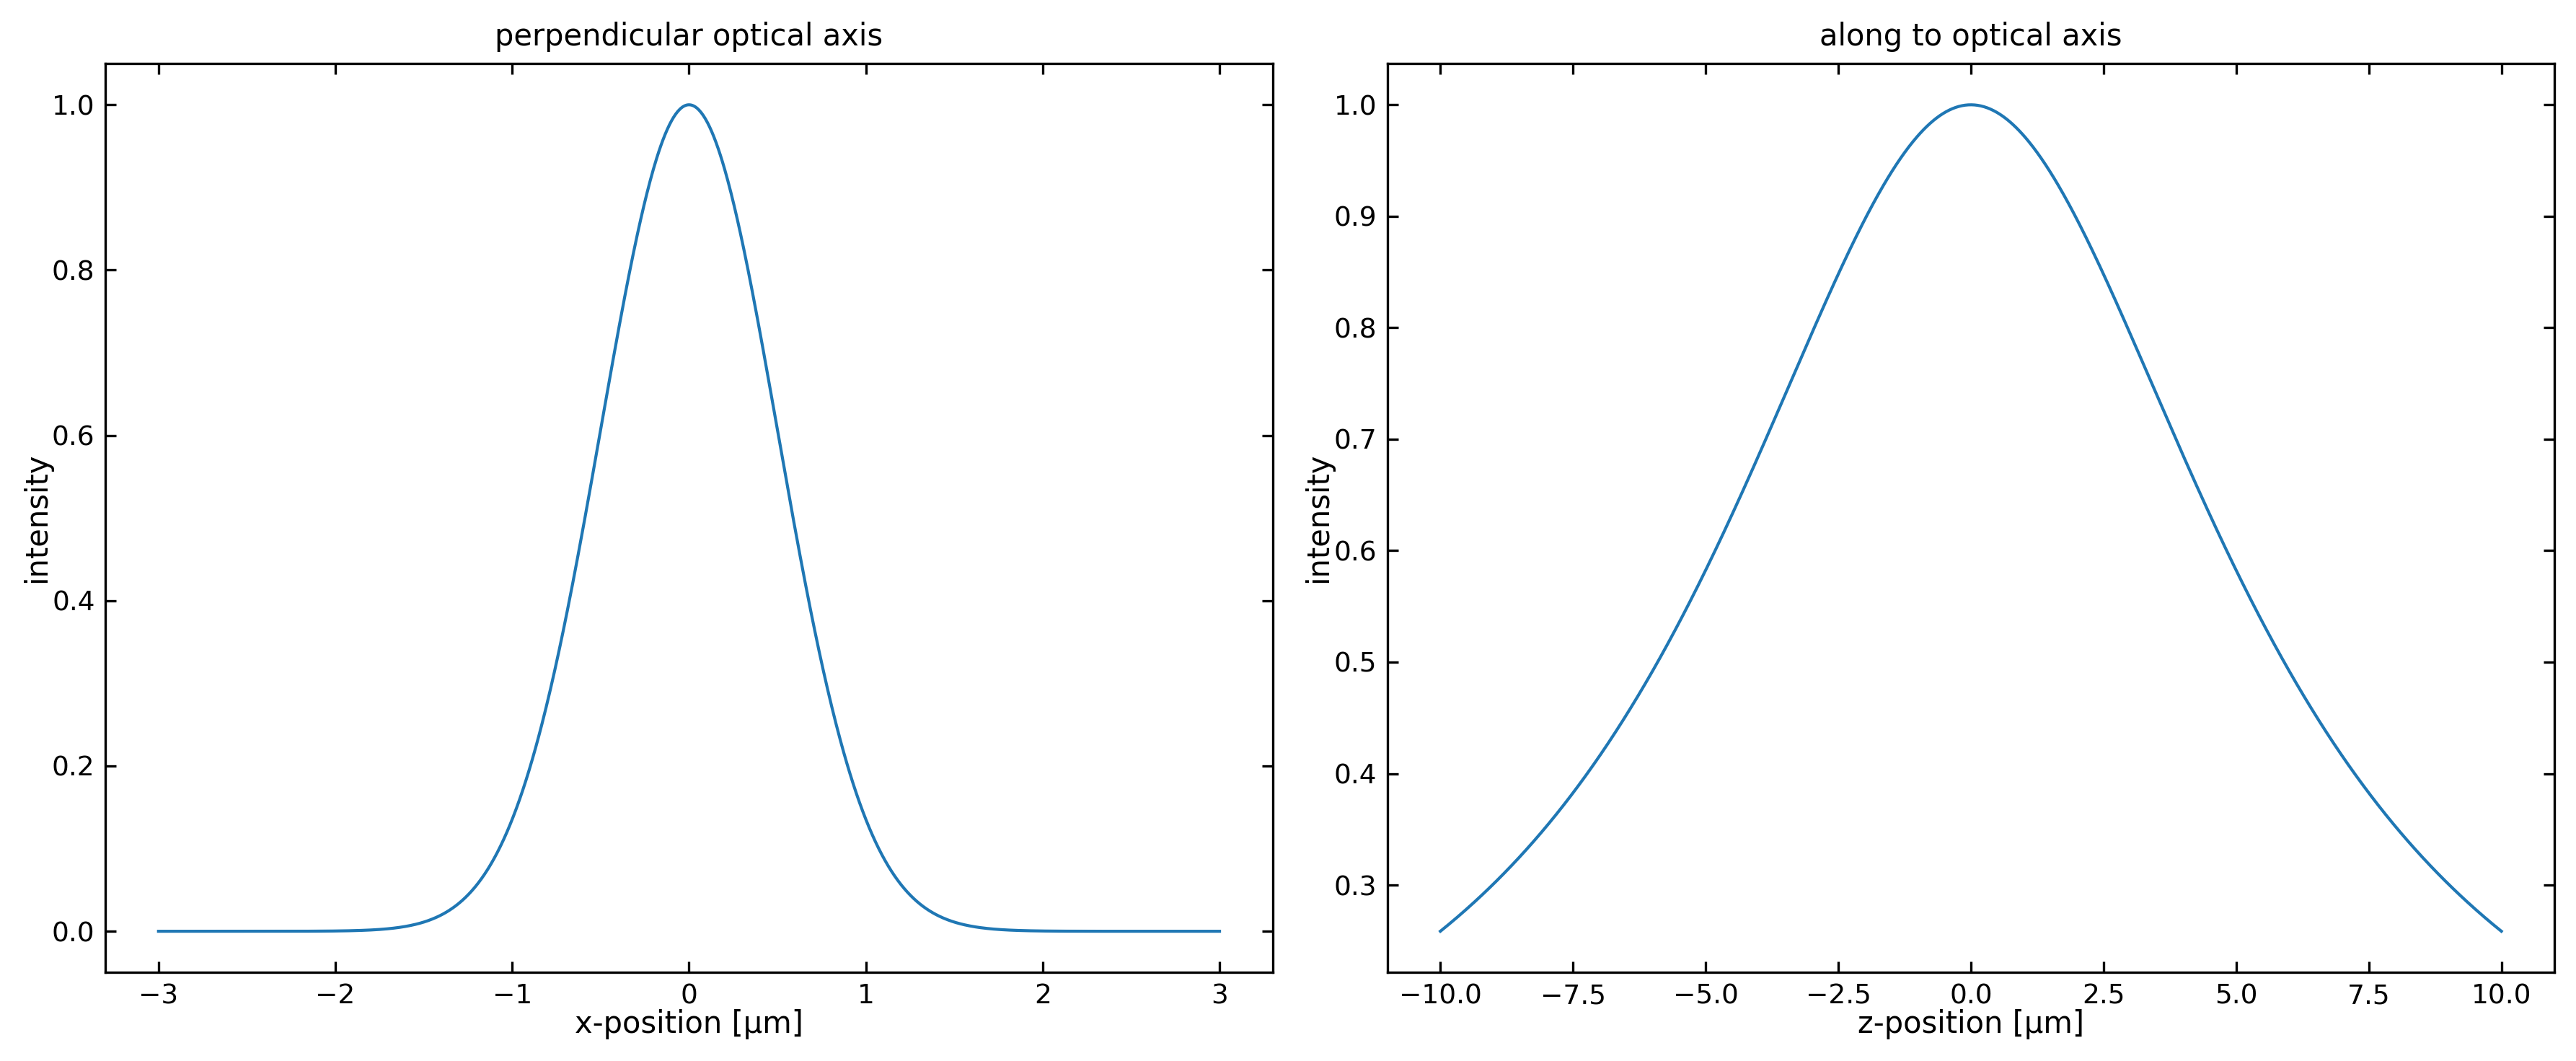

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x*1e6,np.abs(field[500,:])**2)
plt.xlabel('x-position [µm]')
plt.ylabel('intensity')
plt.title('perpendicular optical axis')

plt.subplot(1,2,2)
plt.plot(z*1e6,np.abs(field[:,500])**2)
plt.xlabel('z-position [µm]')
plt.ylabel('intensity')
plt.title('along to optical axis')
plt.tight_layout()
plt.show()